In [ ]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()

def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [ ]:

names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [ ]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

In [ ]:
def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 70):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [ ]:
print_dataset('Train', train_data)

Dataset Train. Shape: (84, 8)
[[40.1  1.   1.   1.   1.   0.   1.   1. ]
 [37.5  0.   1.   0.   0.   0.   0.   0. ]
 [40.8  0.   1.   1.   0.   1.   0.   1. ]
 [36.9  0.   0.   1.   1.   1.   1.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [36.2  0.   1.   0.   0.   0.   0.   0. ]
 [36.3  0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   0.   1.   1.   0.   1.   0. ]
 [37.8  0.   1.   0.   0.   0.   0.   0. ]
 [40.7  1.   1.   0.   1.   0.   0.   1. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [36.7  0.   0.   1.   1.   1.   1.   0. ]
 [40.   1.   1.   1.   1.   0.   1.   1. ]
 [38.9  0.   1.   1.   0.   1.   0.   1. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [41.2  1.   1.   0.   1.   0.   0.   1. ]
 [38.7  0.   1.   1.   0.   1.   0.   1. ]
 [38.5  0.   1.   1.   0.   1.   0.   1. ]
 [37.6  0.   0.   1.   1.   0.   1.   0. ]
 [37.3  0.   0.   1.   1.   1.   1.   0. ]
 [40.9  1.   1.   1.   1.   0.   1.   1. ]
 [37.2  0.   0.   1.   1.   0.   1.   0. ]
 [40.2  1.   1.   1.   1

In [ ]:
print_dataset('Test', test_data)

Dataset Test. Shape: (36, 8)
[[37.9  0.   1.   0.   0.   0.   0.   0. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]
 [41.5  1.   1.   0.   1.   0.   0.   1. ]
 [40.   0.   1.   1.   0.   1.   0.   1. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [41.4  0.   1.   1.   0.   1.   0.   1. ]
 [37.2  0.   1.   0.   0.   0.   0.   0. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [41.2  0.   0.   0.   0.   0.   0.   0. ]
 [41.   0.   0.   0.   0.   0.   0.   0. ]
 [39.   0.   1.   1.   0.   1.   0.   1. ]
 [41.2  0.   1.   1.   0.   1.   0.   1. ]
 [35.9  0.   1.   0.   0.   0.   0.   0. ]
 [40.4  0.   0.   0.   0.   0.   0.   0. ]
 [38.3  0.   1.   1.   0.   1.   0.   1. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [41.3  1.   1.   1.   1.   0.   1.   1. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [36.6  0.   0.   1.   1.   1.   1.   0. ]
 [40.   0.   0.   0.   0.   0.   0.   0. ]
 [40.7  0.   0.   0.   0.

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 10000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

In [ ]:
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    accuracies = []
    n_samples, _ = input.shape


    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output.unsqueeze(1))
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


iteration=0, loss=7.0029, train_acc=45.24%
iteration=500, loss=1.5874, train_acc=45.24%
iteration=1000, loss=1.0175, train_acc=45.24%
iteration=1500, loss=0.4275, train_acc=71.43%
iteration=2000, loss=0.1754, train_acc=100.00%
iteration=2500, loss=0.1587, train_acc=100.00%
iteration=3000, loss=0.1452, train_acc=100.00%
iteration=3500, loss=0.1340, train_acc=100.00%
iteration=4000, loss=0.1245, train_acc=100.00%
iteration=4500, loss=0.1164, train_acc=100.00%
iteration=5000, loss=0.1092, train_acc=100.00%
iteration=5500, loss=0.1030, train_acc=100.00%
iteration=6000, loss=0.0974, train_acc=100.00%
iteration=6500, loss=0.0925, train_acc=100.00%
iteration=7000, loss=0.0880, train_acc=100.00%
iteration=7500, loss=0.0839, train_acc=100.00%
iteration=8000, loss=0.0803, train_acc=100.00%
iteration=8500, loss=0.0769, train_acc=100.00%
iteration=9000, loss=0.0738, train_acc=100.00%
iteration=9500, loss=0.0710, train_acc=100.00%


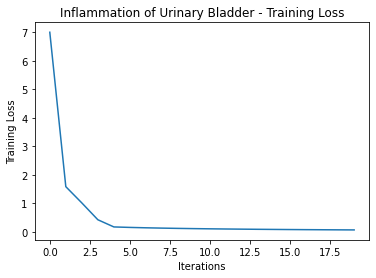

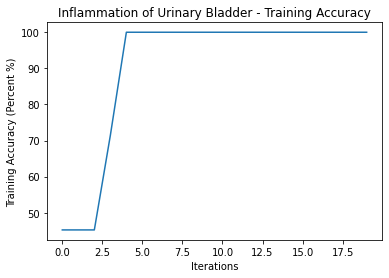


Testing Accuracy = 100.00%


In [ ]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)

iteration=0, loss=5.5991, train_acc=57.14%
iteration=500, loss=0.9881, train_acc=57.14%
iteration=1000, loss=0.8310, train_acc=57.14%
iteration=1500, loss=0.5229, train_acc=66.67%
iteration=2000, loss=0.2020, train_acc=100.00%
iteration=2500, loss=0.1853, train_acc=100.00%
iteration=3000, loss=0.1714, train_acc=100.00%
iteration=3500, loss=0.1597, train_acc=100.00%
iteration=4000, loss=0.1497, train_acc=100.00%
iteration=4500, loss=0.1409, train_acc=100.00%
iteration=5000, loss=0.1332, train_acc=100.00%
iteration=5500, loss=0.1263, train_acc=100.00%
iteration=6000, loss=0.1202, train_acc=100.00%
iteration=6500, loss=0.1147, train_acc=100.00%
iteration=7000, loss=0.1097, train_acc=100.00%
iteration=7500, loss=0.1051, train_acc=100.00%
iteration=8000, loss=0.1009, train_acc=100.00%
iteration=8500, loss=0.0970, train_acc=100.00%
iteration=9000, loss=0.0935, train_acc=100.00%
iteration=9500, loss=0.0902, train_acc=100.00%


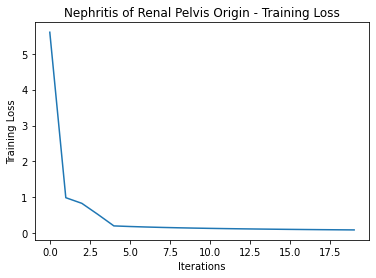

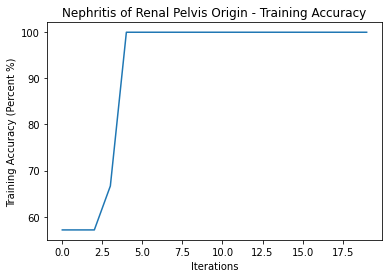


Testing Accuracy = 100.00%


In [ ]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)

In [ ]:
pip install syft

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 606 kB 38.3 MB/s 
     |████████████████████████████████| 11.3 MB 42.5 MB/s 
     |████████████████████████████████| 288 kB 73.4 MB/s 
     |████████████████████████████████| 5.8 MB 53.9 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 61 kB 481 kB/s 
     |████████████████████████████████| 62 kB 903 kB/s 
     |████████████████████████████████| 961 kB 34.6 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 40 kB 7.3 MB/s 
     |████████████████████████████████| 1.1 MB 65.4 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.1 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x3ac4000 @  0x7f01f69a1615 0x58ead6 0x4f355e 0x4

In [ ]:
! pip uninstall syft

In [ ]:
!pip install syft==0.2.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 433 kB 14.5 MB/s 
     |████████████████████████████████| 200 kB 37.6 MB/s 
     |████████████████████████████████| 753.4 MB 6.9 kB/s 
     |████████████████████████████████| 1.8 MB 64.8 MB/s 
     |████████████████████████████████| 9.0 MB 50.6 MB/s 
     |████████████████████████████████| 66 kB 4.0 MB/s 
     |████████████████████████████████| 20.1 MB 72.0 MB/s 
     |████████████████████████████████| 126 kB 65.5 MB/s 
     |████████████████████████████████| 73 kB 2.2 MB/s 
     |████████████████████████████████| 57 kB 5.0 MB/s 
     |████████████████████████████████| 4.0 MB 48.1 MB/s 
     |████████████████████████████████| 26.1 MB 81.3 MB/s 
     |████████████████████████████████| 449 kB 63.6 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 484 kB 62.1 MB/s 
     |██████████████████████████████

In [ ]:
!pip uninstall syft

In [ ]:
!pip install syft==0.2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 23.9 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 2.1 MB 61.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: syft-proto
    Found existing installation: syft-proto 0.5.3
    Uninstalling syft-proto-0.5.3:
      Successfully uninstalled syft-proto-0.5.3
  Attempting uninstall: syft
    Found existing installation: syft 0.2.9
    Uninstalling syft-0.2.9:
      Successfully uninstalled syft-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.9 requires torch<1.14,>=1.7, but you have torch 1.4.0 which is incompatible.
fa

In [ ]:

import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim

n_hospitals = 3
hospitals = []
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)

RuntimeError: ignored

workers of hospital0 = ['hospital1', 'hospital2', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2']


In [ ]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach()
    targets2 = train_data2[:, 7][:, None].clone().detach()
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)

LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


In [ ]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()

def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 3

def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['0.6304', '0.8847', '1.3330'], accuracies=['46.43%', '64.29%', '53.57%']
Iteration=100, losses=['1.5541', '1.4678', '1.0766'], accuracies=['46.43%', '78.57%', '53.57%']
Iteration=200, losses=['1.2442', '0.9769', '0.9827'], accuracies=['46.43%', '64.29%', '53.57%']
Iteration=300, losses=['0.8578', '0.5527', '0.8782'], accuracies=['46.43%', '67.86%', '53.57%']
Iteration=400, losses=['0.5053', '0.3109', '0.7490'], accuracies=['78.57%', '89.29%', '53.57%']
Iteration=500, losses=['0.2766', '0.2055', '0.5399'], accuracies=['85.71%', '100.00%', '67.86%']
Iteration=600, losses=['0.1777', '0.1718', '0.2551'], accuracies=['100.00%', '100.00%', '85.71%']
Iteration=700, losses=['0.1621', '0.1629', '0.2153'], accuracies=['100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1520', '0.1529', '0.2026'], accuracies=['100.00%', '100.00%', '100.00%']
Iteration=900, losses=['0.1431', '0.1442', '0.1914'], accuracies=['100.00%', '100.00%', '100.00%']


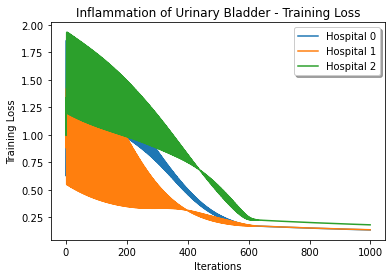

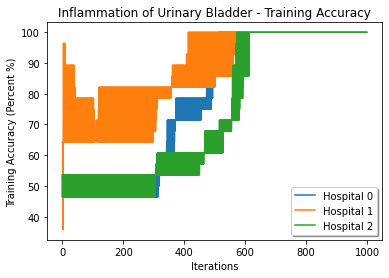


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)

Iteration=0, losses=['1.6432', '1.4397', '1.9249'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=100, losses=['1.1021', '0.8198', '1.4677'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=200, losses=['1.0120', '0.7328', '1.3569'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=300, losses=['0.9364', '0.6789', '1.2426'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=400, losses=['0.8489', '0.6275', '1.0818'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=500, losses=['0.7193', '0.5445', '0.8349'], accuracies=['57.14%', '60.71%', '53.57%']
Iteration=600, losses=['0.5029', '0.3850', '0.5090'], accuracies=['64.29%', '75.00%', '60.71%']
Iteration=700, losses=['0.2432', '0.2099', '0.2335'], accuracies=['96.43%', '92.86%', '100.00%']
Iteration=800, losses=['0.2036', '0.1777', '0.2132'], accuracies=['100.00%', '100.00%', '100.00%']
Iteration=900, losses=['0.1929', '0.1685', '0.2020'], accuracies=['100.00%', '100.00%', '100.00%']


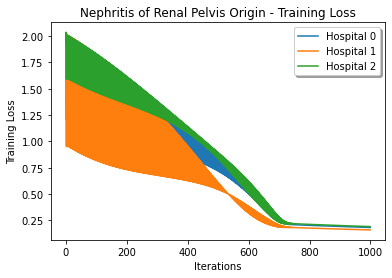

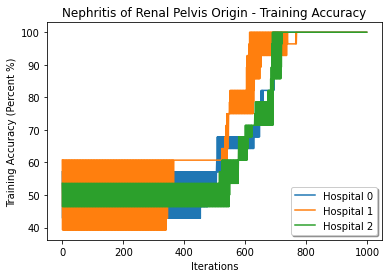


Testing Accuracy = 100.00%


In [ ]:
model = federated_learning(diagnosis_title2, hospital_features, hospital_targets2, test_input, test_output2)